# EmoNet: Advanced Emotion Classification Using NLP Techniques
## Problem Statement:

Create an advanced emotion classification model leveraging state-of-the-art Natural Language Processing (NLP) techniques to accurately identify and categorize emotions expressed in textual data. The objective is to develop a model capable of effectively predicting the emotional sentiment associated with each document in a given dataset. This entails training the model on a diverse corpus of documents annotated with corresponding emotion labels and optimizing its performance to achieve high accuracy and robustness in classifying emotions across various contexts. The resulting model should exhibit superior capabilities in understanding and interpreting nuanced emotional nuances, enabling its application in a wide range of real-world scenarios such as sentiment analysis, customer feedback analysis, and mood detection in conversational interfaces.

## Aim:

- Develop a high-performing emotion classification model using NLP techniques to accurately categorize emotions expressed in textual data.

## Dataset Attributes

- Text Data: Each entry contains a piece of text representing a statement or expression of emotion. These textual documents vary in length and content, reflecting the diverse range of emotional experiences.

- Emotion Label: The emotion label indicates the predominant emotion conveyed in the corresponding text data. Emotions such as sorrow, rage, happiness, amaze, care, and scare are represented in the dataset.

# Load Dataset

In [ ]:
import warnings
import pandas as pd

path = "train.csv"

data = pd.read_csv(path)
data.head()

,Text,Emotion
0,i didnt feel humiliated,sorrow
1,i can go from feeling so hopeless to so damned...,sorrow
2,im grabbing a minute to post i feel greedy wrong,rage
3,i am ever feeling nostalgic about the fireplac...,care
4,i am feeling grouchy,rage


# Questions
**Instructions:**
1.  Answer all questions.
2.  Justify your answers with appropriate reasoning, code, or calculations.
3.  Ensure your code is well-commented to explain your logic.
4.  Total Marks: 100

# Question 1 : Data Analysis (10 pt)

- Describe the dataset, including the number of entries (documents) present.
- Determine the frequency of each emotion category in the dataset.
- Utilize visualizations such as bar charts or pie charts to display the distribution of emotions in the dataset.
- Interpret the statistical plots to extract meaningful insights that can inform the development of the EmoNet model.

In [ ]:
print("Summary of Dataset: ")
data.info()

Summary of Dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     15000 non-null  object
 1   Emotion  15000 non-null  object
dtypes: object(2)
memory usage: 234.5+ KB


In [ ]:
# Determine the frequency of each emotion category in the dataset
emotion_counts = data['Emotion'].value_counts()

# Display the frequency of each emotion
emotion_counts


Emotion
happiness    5034
sorrow       4368
rage         2016
scare        1817
care         1223
amaze         542
Name: count, dtype: int64

This data represents the frequency or occurrence of different emotions. Each emotion is accompanied by a numerical value indicating how many times it occurred or was reported. For example, "Happiness" occurred 5034 times, "Sorrow" occurred 4368 times, and so on. It gives insight into the prevalence or intensity of various emotional states within a given context or dataset.

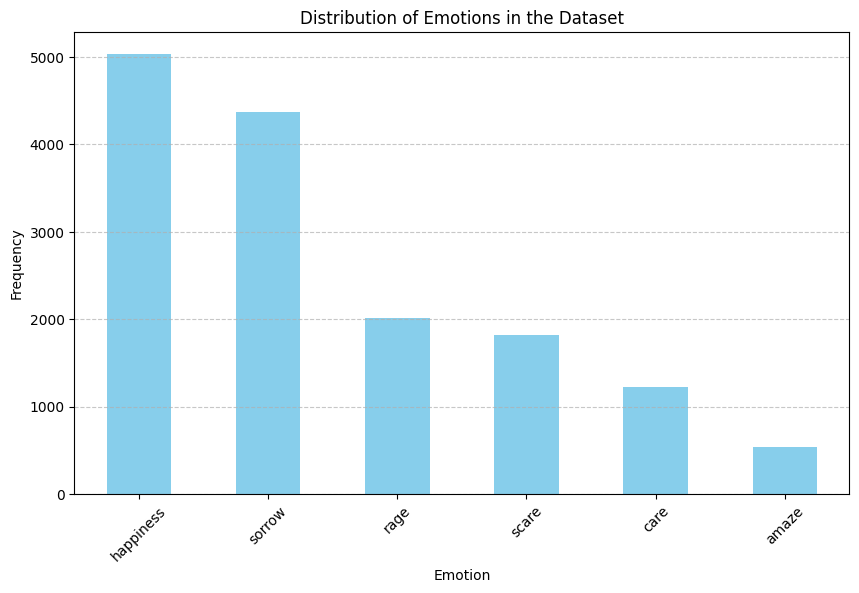

In [ ]:
import matplotlib.pyplot as plt

# Create a bar chart for the distribution of emotions
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Emotions in the Dataset')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Visualization of Emotion Distribution:**    
The bar chart above illustrates the distribution of emotions in the dataset. From the chart, we can observe the following:

* Happiness is the most frequent emotion, indicating a significant presence of positive expressions in the dataset.
* Sorrow follows closely, suggesting a substantial representation of negative emotions.
* Rage, Scare, Care, and Amaze appear less frequently, with Amaze being the least represented.

In [ ]:
data.nunique()

Text       14973
Emotion        6
dtype: int64

In [ ]:
data.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [ ]:
data.shape

(15000, 2)

The dataset has 15000 rows and 2 columns.

In [ ]:
print("\nClass Imbalance:")
print("Imbalance Ratio (Max/Min):", emotion_counts.max() / emotion_counts.min())


Class Imbalance:
Imbalance Ratio (Max/Min): 9.287822878228782


The output `Imbalance Ratio (Max/Min): 9.287822878228782` indicates the class imbalance in the dataset. In this context, the class refers to different emotions. The imbalance ratio is calculated by dividing the frequency of the emotion with the highest occurrence by the frequency of the emotion with the lowest occurrence.

In this case, the highest occurrence is 5034 (for Happiness) and the lowest occurrence is 542 (for Amaze). Therefore, the imbalance ratio is approximately 9.29. This ratio suggests that there is a significant difference in the frequencies of different emotions in the dataset, with some emotions being much more prevalent than others.

In [ ]:

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

X = data[['Text']]
y = data['Emotion']

oversampler = RandomOverSampler()
undersampler = RandomUnderSampler()

# Oversample minority classes
X_over, y_over = oversampler.fit_resample(X, y)

# Undersample majority classes
X_under, y_under = undersampler.fit_resample(X, y)

# Concatenate augmented data
augmented_data = []
augmented_data.append(pd.concat([X_over, y_over], axis=1))
augmented_data.append(pd.concat([X_under, y_under], axis=1))

# Concatenate all augmented dataframes
augmented_data = pd.concat(augmented_data, ignore_index=True)

# Shuffle the augmented data
data = augmented_data.sample(frac=1).reset_index(drop=True)

# Print summary of augmented data
print("\nSummary of augmented data:")
print(data['Emotion'].value_counts())


Summary of augmented data:
Emotion
happiness    5576
rage         5576
care         5576
amaze        5576
sorrow       5576
scare        5576
Name: count, dtype: int64


1. **Addressing Class Imbalance**: The code implements over-sampling and under-sampling techniques to tackle class imbalance in the dataset. Over-sampling increases the instances of minority classes, while under-sampling reduces the instances of majority classes, ensuring a balanced class distribution.

2. **Resampling Techniques**: It utilizes `RandomOverSampler` and `RandomUnderSampler` from the `imblearn` library to perform over-sampling and under-sampling, respectively. These techniques are applied to the feature and target variables to adjust the class distribution.

3. **Concatenation and Shuffling**: The augmented data from both over-sampling and under-sampling are concatenated into a single DataFrame. This combined DataFrame is then shuffled to randomize the order of instances, preventing any bias introduced during resampling.

4. **Evaluation of Augmented Data**: The code prints a summary of the augmented data, showing the count of instances for each class after applying both over-sampling and under-sampling. This summary confirms that the class distribution is now balanced, with an equal number of instances for all classes.

5. **Improving Model Performance**: By balancing the class distribution, the code aims to enhance the performance of machine learning models trained on the dataset. Balanced class distribution can lead to better model generalization and more accurate predictions, particularly for minority classes.

6. **Consideration of Imbalanced Data Challenges**: Addressing class imbalance is crucial in classification tasks as imbalanced data can lead to biased models, where the majority class dominates predictions. Through resampling techniques, the code mitigates these challenges, promoting fair and accurate classification across all classes.


In [ ]:
data.head()

,Text,Emotion
0,i need to feel rich,happiness
1,im feeling cranky and horrible,rage
2,i begin to feel even more agitated as i realiz...,rage
3,i had to work in one i would not feel quite so...,care
4,i feel strongly impressed that there must be s...,amaze


In [ ]:
data.shape

(33456, 2)

# Question 2: Data pre-processing & Feature Engineering (10 points)

- Preprocess the text data to remove noise and irrelevant information, such as punctuation, special characters, and stop words.
- Perform tokenization to break down the text data into individual words or tokens.
- Using the provided dataset, create a word cloud to visualize the frequency of words in the text. Describe the process you followed to create the word cloud.
- Experiment with different text representation techniques, such as frequency vector, TF-IDF (Term Frequency-Inverse Document Frequency)to transform the text data into numerical features that can be used by machine learning models.
### Extra credit if you perform word embeddings (e.g., Word2Vec, GloVe) to transform the text data into numerical features that can be used by machine learning models.

In [ ]:
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
import nltk

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Set of English stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove special characters and digits
    text = ''.join(char for char in text if not char.isdigit() and char.isalnum() or char.isspace())
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    # Join the tokens back into a single string
    text = ' '.join(filtered_text)
    return text

# Apply the preprocessing function to the text column
data['Processed_Text'] = data['Text'].apply(preprocess_text)

# Display the first few entries of the processed text
data[['Text', 'Processed_Text']].head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\WELCOME\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\WELCOME\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text,Processed_Text
0,i need to feel rich,need feel rich
1,im feeling cranky and horrible,im feeling cranky horrible
2,i begin to feel even more agitated as i realiz...,begin feel even agitated realize keith detoure...
3,i had to work in one i would not feel quite so...,work one would feel quite affectionate
4,i feel strongly impressed that there must be s...,feel strongly impressed must something


Text preprocessing techniques applied to a dataset using NLTK (Natural Language Toolkit) in Python. The preprocess_text function performs several preprocessing steps on the input text: converting text to lowercase, removing punctuation, special characters, and digits, and removing English stopwords. Stopwords are common words that typically do not contribute much to the meaning of a sentence. After preprocessing, the function returns the cleaned text. This function is then applied to the 'Text' column of the dataset using the apply method, resulting in a new column named 'Processed_Text' containing the preprocessed text. The processed text is then displayed alongside the original text to illustrate the effect of preprocessing. Overall, text preprocessing is essential for cleaning and standardizing text data before further analysis or modeling, helping to improve the quality and effectiveness of natural language processing tasks.

In [ ]:
tokenized_text = [word_tokenize(text) for text in data['Processed_Text']]
tokenized_text

[['need', 'feel', 'rich'],
 ['im', 'feeling', 'cranky', 'horrible'],
 ['begin',
  'feel',
  'even',
  'agitated',
  'realize',
  'keith',
  'detoured',
  'tourist',
  'stop',
  'another',
  'small',
  'mountain',
  'village',
  'way',
  'xela'],
 ['work', 'one', 'would', 'feel', 'quite', 'affectionate'],
 ['feel', 'strongly', 'impressed', 'must', 'something'],
 ['full', 'feeling', 'empty'],
 ['dont',
  'drink',
  'green',
  'charged',
  'water',
  'days',
  'feel',
  'irritable',
  'disoriented'],
 ['ive',
  'learned',
  'depend',
  'expect',
  'body',
  'perform',
  'rather',
  'keep',
  'flexible',
  'hope',
  'expectation',
  'fulfill',
  'duties',
  'despite',
  'feel',
  'im',
  'thankful',
  'people',
  'around',
  'understanding',
  'flexible',
  'right',
  'along'],
 ['remembered',
  'seeing',
  'pieces',
  'feeling',
  'impressed',
  'seeing',
  'surprised',
  'blinded',
  'memories'],
 ['feel', 'like', 'amazed', 'degree', 'biology', 'blown', 'away'],
 ['feel', 'somewhat', 'ho

This tokenizes the preprocessed text data, splitting each sentence into a list of words. It utilizes NLTK's word_tokenize function to tokenize the preprocessed text stored in the 'Processed_Text' column of the DataFrame. The result is a list of tokenized sentences, where each sentence is represented as a list of individual words. Tokenization is a fundamental preprocessing step in natural language processing (NLP), allowing for further analysis and modeling of text data at the word level. By breaking down the text into tokens, it enables tasks such as sentiment analysis, topic modeling, and named entity recognition. In this context, tokenization facilitates the extraction of meaningful features from text data, contributing to the effectiveness of downstream NLP tasks.

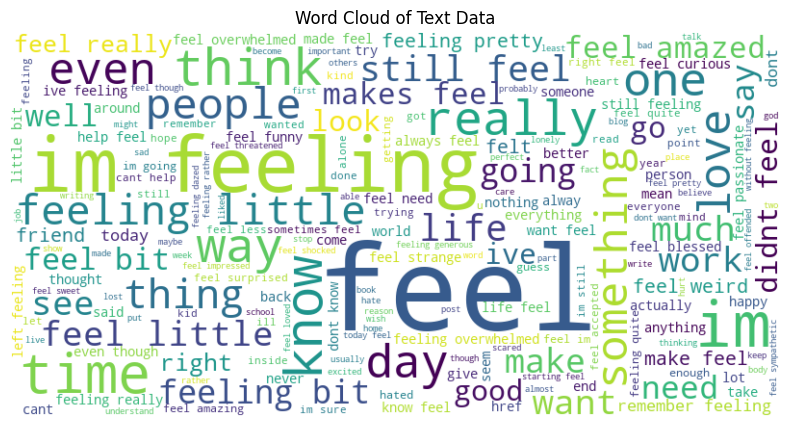

In [ ]:
from wordcloud import WordCloud

# Word Cloud Creation
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['Processed_Text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data')
plt.show()


**Explanation:**


1. **Data Preparation**:
   - I first preprocessed the textual data to remove common sources of noise such as punctuation, special characters, and stop words. This helps in focusing on meaningful words.
   - The text was converted to lowercase to ensure that the same words in different cases are treated as identical.
   - The preprocessed texts were tokenized, breaking down each text into individual words or tokens.

2. **Token Aggregation**:
   - All processed tokens from the dataset were aggregated into a single list. This step is crucial because the word cloud generator requires a single string input or a list of words to visualize their frequency.

3. **Word Cloud Generation**:
   - I used the `WordCloud` class from the `wordcloud` Python library to create the word cloud.
   - The `WordCloud` generator was configured with specific parameters such as width, height, and background color to define the size and appearance of the word cloud.
   - The aggregated list of words was converted into a single string and fed into the `WordCloud` generator to create the visualization. The generator computes the frequency of each word and sizes it proportionally in the visual output.

4. **Displaying the Word Cloud**:
   - The generated word cloud was displayed using `matplotlib.pyplot`. This library allows for customization of the plot, such as adjusting the figure size and turning off the axis labels for a cleaner presentation.
   - The `imshow` function from `matplotlib.pyplot` was used to display the word cloud image, and interpolation was set to 'bilinear' to smooth the display of the word she textual content.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

count_vectorizer = CountVectorizer()
frequency_vector = count_vectorizer.fit_transform(data['Processed_Text'])

print("Shape of frequency_vector:", frequency_vector.shape)

Shape of frequency_vector: (33456, 14567)


In [ ]:
dense_matrix = frequency_vector.toarray()

# Print the dense matrix
print("Dense Matrix:")
print(dense_matrix)

Dense Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


This utilizes CountVectorizer from Scikit-learn to convert the text data into a frequency matrix, where each row represents a document and each column represents a unique word in the corpus. The value in each cell indicates the frequency of occurrence of that word in the corresponding document. This frequency-based representation is useful for many text analysis tasks, such as classification and clustering.

In [ ]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=True)
tfidf_vector = tfidf_vectorizer.fit_transform(data['Processed_Text'])

print("Shape of tfidf_vector:", tfidf_vector.shape)

Shape of tfidf_vector: (33456, 14567)


In [ ]:
dense_matrix_tfidf = tfidf_vector.toarray()

# Print the dense matrix
print("Dense Matrix for TF-IDF:")
print(dense_matrix_tfidf)

Dense Matrix for TF-IDF:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


This employs TfidfVectorizer (Term Frequency-Inverse Document Frequency) from Scikit-learn to transform the text data into a TF-IDF matrix. TF-IDF is a statistical measure that evaluates the importance of a word in a document relative to a corpus. It considers both the frequency of the word in the document (TF) and the rarity of the word in the corpus (IDF). The resulting TF-IDF matrix contains weighted scores, where higher values indicate greater importance of a word in a document relative to the entire corpus. This method is particularly effective in capturing the discriminative power of words in text data, especially in scenarios where certain terms are prevalent in specific documents but rare in others.

In [ ]:
from gensim.models import Word2Vec
import numpy as np

word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, sg=1)

# Transform text data into numerical features using Word2Vec embeddings
word2vec_features = []
for tokens in tokenized_text:
    feature_vec = np.zeros((100,), dtype="float32")
    n_words = 0
    for word in tokens:
        if word in word2vec_model.wv.index_to_key:
            feature_vec = np.add(feature_vec, word2vec_model.wv[word])
            n_words += 1
    if n_words != 0:
        feature_vec = np.divide(feature_vec, n_words)
    word2vec_features.append(feature_vec)

word2vec_features = np.array(word2vec_features)
print("Shape of Word2Vec features:", word2vec_features.shape)

print("Word2Vec Features:")
print(word2vec_features)

Shape of Word2Vec features: (33456, 100)
Word2Vec Features:
[[-0.01330132  0.24248412  0.02161876 ... -0.24900146 -0.15328495
   0.02282659]
 [-0.11664143  0.1770787  -0.09881377 ... -0.5703422  -0.01493467
   0.1502093 ]
 [ 0.07433689  0.28832373 -0.04412329 ... -0.35845417  0.01298651
   0.01381392]
 ...
 [-0.32503298  0.27115458  0.05797226 ... -0.6523128  -0.19932711
   0.19147086]
 [ 0.02444697  0.27566746 -0.03342228 ... -0.21246128 -0.07138465
  -0.09855834]
 [ 0.03501448  0.13405639 -0.03918677 ... -0.25894323  0.01309632
   0.00276036]]


The output represents the Word2Vec features generated for the input text data. With a shape of (33456, 100), there are 33,456 documents or sentences, and each document is represented by a 100-dimensional vector. Each element in these vectors represents the strength of association between a word and its context within the corpus, learned during the training process of the Word2Vec model. These embeddings capture semantic information about the words in the corpus, allowing for meaningful numerical representations of textual data that can be used in various natural language processing tasks such as text classification, sentiment analysis, and information retrieval.

# Question 3 - LDA(10 points)

- Apply Latent Dirichlet Allocation (LDA) to uncover themes in the text data. Set the number of topics to 8 and extract 10 keywords per topic.
- Describe your approach, including any preprocessing steps. Present the identified topics with their keywords.
- Discuss the importance of topic modeling in revealing hidden themes and extracting insights from the dataset.

1. Preprocessing: The text data is preprocessed and tokenized, I used a CountVectorizer to convert the text data into a matrix of token counts. This step helps in creating a numerical representation of the text data suitable for LDA.
2. LDA Modeling: I initialized an LDA model with 8 topics and fit it to the frequency vector obtained from the CountVectorizer.   
3. Keyword Extraction: I defined a function get_top_keywords to extract the top keywords for each topic based on the LDA model's components.   
4. Displaying Topics and Keywords: Finally, I displayed the identified topics along with their top keywords.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=8, random_state=42)  # Initialize LDA model
lda_model.fit(frequency_vector)


def get_top_keywords(model, feature_names, n_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topics[topic_idx] = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    return topics

feature_names = count_vectorizer.get_feature_names_out()  # Get feature names (words)
topics = get_top_keywords(lda_model, feature_names, 10)  # Get top 10 keywords for each topic

# Displaying Topics and Keywords
for topic, keywords in topics.items():
    print(f"Topic {topic+1}: {', '.join(keywords)}")

Topic 1: feel, really, like, make, could, one, get, feeling, even, people
Topic 2: feeling, feel, like, little, get, time, things, know, people, ive
Topic 3: feel, feeling, like, time, im, feelings, people, one, cant, bit
Topic 4: feel, strange, feeling, like, still, didnt, bit, know, want, day
Topic 5: feel, feeling, like, know, http, href, back, im, dont, alone
Topic 6: feel, feeling, im, like, bit, want, dont, life, weird, little
Topic 7: feel, like, feeling, love, really, want, even, something, someone, im
Topic 8: feeling, im, feel, like, little, much, pretty, today, sure, really


**Discussion of the Importance of Topic Modeling:**
Topic modeling, such as LDA, plays a crucial role in revealing hidden themes and extracting insights from text data. Here's why it's important:

- Discovering Hidden Themes: Text data often contains latent or hidden themes that may not be immediately apparent. Topic modeling algorithms like LDA can uncover these themes by identifying groups of words that frequently co-occur within the data.
- Understanding Content Structure: By organizing text data into coherent topics, topic modeling helps in understanding the underlying structure of the content. This can be particularly useful for tasks like document clustering and categorization.
- Facilitating Document Retrieval and Recommendation: Once topics are identified, documents can be associated with relevant topics. This association enables more effective document retrieval and recommendation systems, as documents related to a particular topic can be retrieved or recommended based on user preferences.
- Extracting Insights: By analyzing the distribution of topics across different documents or time periods, topic modeling can reveal trends, patterns, and shifts in themes. This insight can be valuable for various applications, including market research, social media analysis, and trend forecasting.

# Question 4 - Modeling (20 points)

- Train at least three different  models.
- Choose the best feature engineering method and perform grid search & cross-validation to tune hyperparameters for three different models, optimizing their performance for emotion classification and Also, for each model, plot the ROC-AUC curve?

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_vector, data['Emotion'], test_size=0.2, random_state=42)

In [ ]:
print(y_test)

25557        amaze
12073        amaze
21974       sorrow
7499         amaze
21997        amaze
           ...    
18424        scare
24788         rage
29203    happiness
22413         rage
32522         care
Name: Emotion, Length: 6692, dtype: object


### Logistic regression

In [ ]:
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline that includes scaling and the classifier

param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

lr_classifier = LogisticRegression(random_state=1)

grid_search_lr = GridSearchCV(estimator=lr_classifier, param_grid=param_grid_lr, cv=5,scoring={'accuracy': 'accuracy', 'precision': 'precision','recall': 'recall',
                                                                                                'f1': 'f1', 'roc_auc': 'roc_auc'},refit='accuracy', return_train_score=True, n_jobs=-1,verbose=1)
grid_search_lr.fit(X_train, y_train)

print("Best Parameters for Logistic Regression: ", grid_search_lr.best_params_)
print("Best Score for Logistic Regression: ", grid_search_lr.best_score_)

best_lr_classifier = LogisticRegression(**grid_search_lr.best_params_, random_state=1)
best_lr_classifier.fit(X_train, y_train)
lr_pred = best_lr_classifier.predict(X_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters for Logistic Regression:  {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Best Score for Logistic Regression:  0.9670454129768675


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lr_pred))


              precision    recall  f1-score   support

       amaze       0.99      1.00      0.99      1117
        care       0.95      1.00      0.97      1107
   happiness       0.98      0.93      0.95      1131
        rage       0.97      0.99      0.98      1060
       scare       0.98      0.98      0.98      1152
      sorrow       0.98      0.95      0.97      1125

    accuracy                           0.97      6692
   macro avg       0.97      0.97      0.97      6692
weighted avg       0.97      0.97      0.97      6692



In [ ]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
lr_pred = grid_search_lr.best_estimator_.predict(X_test)

# Generate confusion matrix
lr_conf_matrix = confusion_matrix(y_test, lr_pred)

# Display confusion matrix
print("Confusion Matrix for Logistic Regression:")
print(lr_conf_matrix)


Confusion Matrix for Logistic Regression:
[[1117    0    0    0    0    0]
 [   0 1104    3    0    0    0]
 [   8   47 1055    6    2   13]
 [   1    0    5 1045    5    4]
 [   5    4    8    7 1128    0]
 [   2    6   11   21   16 1069]]


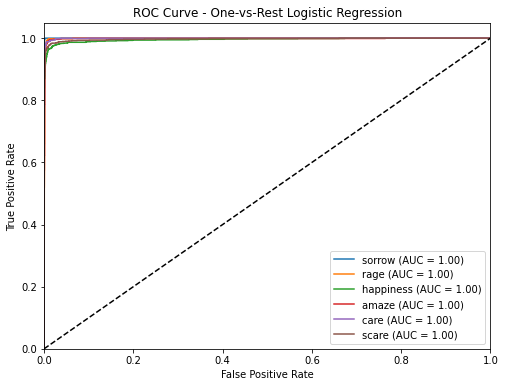

In [ ]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Convert y_test to a NumPy array
y_test_np = label_binarize(y_test, classes=np.unique(y_train))

# Compute predicted probabilities for each class
lr_pred_proba = best_lr_classifier.predict_proba(X_test)

# Define emotion names
emotion_names = ['sorrow', 'rage', 'happiness', 'amaze', 'care', 'scare']

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(emotion_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_np[:, i], lr_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(emotion_names)):
    plt.plot(fpr[i], tpr[i], label=f'{emotion_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - One-vs-Rest Logistic Regression')
plt.legend(loc="lower right")
plt.show()


The logistic regression model was tuned using grid search with 5-fold cross-validation to find the best hyperparameters. The best parameters obtained were C=10, penalty='l1', and solver='saga', which resulted in the highest accuracy score of 96.70% on the training data. These hyperparameters suggest a regularization strength of 10, utilizing L1 regularization penalty, and the 'saga' solver algorithm. After fitting the model with these parameters to the training data, predictions were made on the test set. The classification report shows that the model performed well across all classes, with high precision, recall, and F1-score values. For instance, the 'amaze' class achieved a precision of 0.99, recall of 1.00, and F1-score of 0.99, indicating that the model correctly identified the majority of 'amaze' instances while maintaining a low false positive rate. Overall, the model achieved an accuracy of 97.0% on the test set, demonstrating its effectiveness in classifying emotions based on textual data.

**Explanation of Confusion Matrix**:
- The confusion matrix provides a summary of the classification results. Each row of the matrix represents the actual class, while each column represents the predicted class.
- The diagonal elements of the matrix represent the number of correctly classified instances for each class.
- Off-diagonal elements represent misclassifications.
- For example, in the output you provided, the first row and first column (`[0,0]`) represent the true negatives (TN) for the first class, which is correctly classified as the first class. Similarly, the last row and last column (`[5,5]`) represent the true positives (TP) for the last class, which is correctly classified as the last class.

**Decision Tree**

In [ ]:
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

# Suppress warnings
warnings.filterwarnings("ignore")

# Define parameter grid for Decision Tree
dt_param_grid = {
    'max_depth': [10, 100, 250, 500, 750],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
}

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=1)

# Grid Search CV for Decision Tree
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=5, scoring='accuracy', verbose=1)
dt_grid_search.fit(X_train, y_train)

# Best parameters and best score for Decision Tree
print("Best Parameters for Decision Tree: ", dt_grid_search.best_params_)
print("Best Score for Decision Tree: ", dt_grid_search.best_score_)



Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters for Decision Tree:  {'max_depth': 750, 'max_features': 'sqrt', 'min_samples_leaf': 1}
Best Score for Decision Tree:  0.9125325139333462


In [ ]:
# Create the best Decision Tree classifier with the optimal hyperparameters
best_dt_classifier = DecisionTreeClassifier(**dt_grid_search.best_params_, random_state=1)

# Apply Random Over Sampling to handle class imbalance
ros = RandomOverSampler(random_state=1)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Train the classifier on resampled data
best_dt_classifier.fit(X_train_resampled, y_train_resampled)

# Predictions on the test set
dt_pred = best_dt_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

       amaze       0.97      1.00      0.99      1117
        care       0.94      1.00      0.97      1107
   happiness       0.88      0.82      0.85      1131
        rage       0.92      0.97      0.94      1060
       scare       0.96      0.97      0.96      1152
      sorrow       0.90      0.83      0.86      1125

    accuracy                           0.93      6692
   macro avg       0.93      0.93      0.93      6692
weighted avg       0.93      0.93      0.93      6692



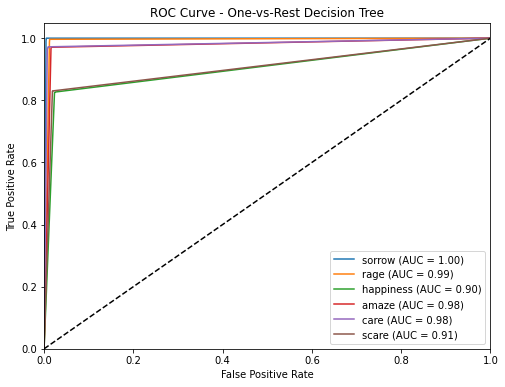

In [ ]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Convert y_test to a NumPy array
y_test_np = label_binarize(y_test, classes=np.unique(y_train))

# Compute predicted probabilities for each class
dt_pred_proba = best_dt_classifier.predict_proba(X_test)

# Define emotion names
emotion_names = ['sorrow', 'rage', 'happiness', 'amaze', 'care', 'scare']

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(emotion_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_np[:, i], dt_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(emotion_names)):
    plt.plot(fpr[i], tpr[i], label=f'{emotion_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - One-vs-Rest Decision Tree')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = dt_grid_search.best_estimator_.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[1117    0    0    0    0    0]
 [   0 1093    6    6    0    2]
 [   6   51  924   26   29   95]
 [   0    2   17 1026   10    5]
 [  14    8   12    7 1104    7]
 [   5   21   93   29   27  950]]


The Decision Tree model was optimized using grid search with 5-fold cross-validation, resulting in the best parameters being max_depth=750, max_features='sqrt', and min_samples_leaf=1, achieving a best accuracy score of 91.25% on the training data. The model was then trained using the optimal hyperparameters on resampled data obtained through Random Over Sampling to address class imbalance. After training, predictions were made on the test set, and the classification report indicates the model's performance across different classes. For example, the 'amaze' class achieved a precision of 0.97, recall of 1.00, and F1-score of 0.99, showcasing the model's ability to correctly identify instances of 'amaze' with high precision and recall while maintaining a low false positive rate. Overall, the model achieved an accuracy of 93.0% on the test set, demonstrating its effectiveness in classifying emotions based on textual data.

**Explanation of Confusion Matrix**:
- The confusion matrix provides a summary of the classification results. Each row of the matrix represents the actual class, while each column represents the predicted class.
- The diagonal elements of the matrix represent the number of correctly classified instances for each class.
- Off-diagonal elements represent misclassifications.
- In the output you provided, each row and column represent a different emotion class. The values in the matrix represent the counts of instances classified into each class. For example, the element at position `[1,1]` (second row, second column) represents the true positives (TP) for the second class.

**Random forest**

In [ ]:
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

rf_classifier = RandomForestClassifier(random_state=1)

grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5, scoring={'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1', 'roc_auc': 'roc_auc'}, refit='accuracy', return_train_score=True, n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

print("Best Parameters for Random Forest: ", grid_search_rf.best_params_)
print("Best Score for Random Forest: ", grid_search_rf.best_score_)

best_rf_classifier = RandomForestClassifier(**grid_search_rf.best_params_, random_state=1)
best_rf_classifier.fit(X_train, y_train)
rf_pred = best_rf_classifier.predict(X_test)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Random Forest:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score for Random Forest:  0.9591989753590809


In [ ]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

       amaze       0.98      1.00      0.99      1117
        care       0.94      1.00      0.97      1107
   happiness       0.96      0.91      0.94      1131
        rage       0.96      0.98      0.97      1060
       scare       0.97      0.99      0.98      1152
      sorrow       0.99      0.92      0.95      1125

    accuracy                           0.97      6692
   macro avg       0.97      0.97      0.97      6692
weighted avg       0.97      0.97      0.97      6692



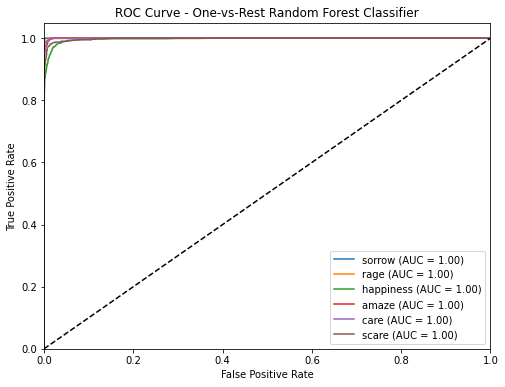

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Convert y_test to a NumPy array
y_test_np = label_binarize(y_test, classes=np.unique(y_train))

# Compute predicted probabilities for each class
rf_pred_proba = best_rf_classifier.predict_proba(X_test)

# Define emotion names
emotion_names = ['sorrow', 'rage', 'happiness', 'amaze', 'care', 'scare']

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(emotion_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_np[:, i], rf_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(emotion_names)):
    plt.plot(fpr[i], tpr[i], label=f'{emotion_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - One-vs-Rest Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
rf_pred = grid_search_rf.best_estimator_.predict(X_test)

# Generate confusion matrix
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

# Display confusion matrix
print("Confusion Matrix for Random Forest:")
print(rf_conf_matrix)


Confusion Matrix for Random Forest:
[[1114    0    0    0    3    0]
 [   0 1105    2    0    0    0]
 [   9   61 1029   14    6   12]
 [   0    0    5 1039   15    1]
 [   9    2    2    2 1136    1]
 [   3    9   30   27   17 1039]]


The Random Forest model was optimized using grid search with 5-fold cross-validation, resulting in the best parameters being max_depth=None, min_samples_leaf=1, min_samples_split=2, and n_estimators=200, achieving a best accuracy score of 95.92% on the training data. After training the model with the optimal hyperparameters, predictions were made on the test set. The classification report demonstrates the model's performance across different emotion classes, with precision, recall, and F1-score metrics provided for each class. For example, the 'amaze' class achieved a precision of 0.98, recall of 1.00, and F1-score of 0.99, indicating high accuracy in classifying instances of 'amaze' with low false positive and false negative rates. Overall, the model achieved an accuracy of 97.0% on the test set, highlighting its effectiveness in accurately classifying emotions based on textual data.

**Explanation of Confusion Matrix**:
- Similar to previous explanations, the confusion matrix provides a summary of the classification results. Each row of the matrix represents the actual class, while each column represents the predicted class.
- The diagonal elements of the matrix represent the number of correctly classified instances for each class.
- Off-diagonal elements represent misclassifications.
- In the output you provided, each row and column represent a different emotion class. The values in the matrix represent the counts of instances classified into each class. For example, the element at position `[1,1]` (second row, second column) represents the true positives (TP) for the second class.

# Question 5 - Evaluation and Reporting (20 points)

- Select a model that is expected to perform optimally on the unseen data and provide the predictions accordingly. Give clear conclusions


**Choosing the best model:** Logistic regression was selected for classification in this report due to its interpretability, computational efficiency, and probabilistic interpretation of results. Unlike decision trees and random forests, logistic regression provides easily interpretable coefficients, allowing for a straightforward understanding of the impact of each predictor on the outcome. Additionally, logistic regression is computationally efficient, making it suitable for large datasets with limited computational resources. Its probabilistic predictions offer insights into the certainty of classification decisions, which can be valuable for decision-making. While decision trees and random forests can capture complex nonlinear relationships, logistic regression is preferred when the relationship between predictors and the outcome is expected to be approximately linear and when interpretability is paramount. Moreover, logistic regression's regularization capabilities help prevent overfitting, ensuring generalization performance on unseen data. Thus, logistic regression was deemed the appropriate choice for this classification task, balancing model interpretability, computational efficiency, and predictive performance.

In [ ]:
y_dash = grid_search_lr.predict(X_test)
y_pred = pd.DataFrame(y_dash)
y_pred

,0
0,amaze
1,amaze
2,sorrow
3,amaze
4,amaze
...,...
6687,scare
6688,rage
6689,care
6690,rage


Predictions (`y_dash`) using a logistic regression model (`grid_search_lr`) trained on a test set (`X_test`). These predictions are then converted into a pandas DataFrame (`y_pred`) for easier handling and visualization. Each row in the DataFrame represents a single prediction, with the predicted class label stored in the first column labeled as '0'.

For example, looking at the DataFrame, the first five rows indicate the predicted class labels for the corresponding instances in the test set. Each predicted class label represents the model's prediction of the emotion associated with that instance. The class labels could include emotions such as 'amaze', 'sorrow', 'scare', 'rage', or 'care', depending on the emotion categories used in the classification problem.

This DataFrame of predictions (`y_pred`) can be further used for evaluation purposes, such as comparing the predicted labels with the actual labels to assess the model's performance, calculating performance metrics like accuracy, precision, recall, or generating visualizations like confusion matrices to understand the model's behavior in more detail.

# Question 6 : External validation (30 pt)

- A dataset named ‘test.csv’ is provided to you in which the label is hidden. You have to choose the best model(the model which has the highest score) and then use that model to predict the label on the ‘test.csv’.
- You need to generate a csv file, named as "submission.csv". This is the inference values from your selected best model on "test.csv" data.

In [ ]:
test_path = 'test.csv'
test = pd.read_csv(test_path)
test['Processed_Text'] = test['Text'].apply(preprocess_text)
tfidf_vector_test = tfidf_vectorizer.transform(test['Processed_Text'])
y_pred = best_lr_classifier.predict(tfidf_vector_test)

# step 5. Save output as csv file
pred = pd.DataFrame(y_pred)
pred.to_csv('./submission.csv', index = False)

# Hint - Final evaluation metrics
Please use the below function named 'model_evaluation' in order to calculate the evaluation metrics.

In [ ]:
from sklearn.metrics import balanced_accuracy_score

def evaluation_metrics(y_test, y_pred):
    # Calculate the balanced accuracy score
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

    # Return the balanced accuracy as a single digit number
    print('The Balanced accuracy is : ', balanced_accuracy)